In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/data_rms_bearing_1.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520
1,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855
2,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333
3,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027
4,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291


In [3]:
X = np.array(data[0]).reshape(-1, 1) # untuk merubah bentuk matriks
X

array([[0.12408584],
       [0.1251568 ],
       [0.1251332 ],
       ...,
       [0.29009982],
       [0.27928441],
       [0.32616112]])

In [4]:
from hmmlearn.hmm import GMMHMM

In [5]:
model = GMMHMM(n_components=3, n_mix=2, 
               n_iter=1000, random_state=100,
               verbose=True).fit(X)

         1        4666.1368             +nan
         2        6460.7413       +1794.6046
         3        6990.1551        +529.4138
         4        7261.4450        +271.2899
         5        7742.2772        +480.8322
         6        8522.2066        +779.9294
         7        9151.8987        +629.6921
         8        9319.8577        +167.9590
         9        9332.2959         +12.4382
        10        9334.7286          +2.4327
        11        9337.0036          +2.2750
        12        9340.3349          +3.3314
        13        9346.4186          +6.0837
        14        9358.5970         +12.1785
        15        9397.8525         +39.2555
        16        9544.9234        +147.0708
        17        9670.5235        +125.6001
        18        9685.1721         +14.6486
        19        9688.4819          +3.3097
        20        9689.3747          +0.8929
        21        9689.8394          +0.4647
        22        9690.1109          +0.2715
        23

In [6]:
model.startprob_

array([1., 0., 0.])

In [7]:
model.transmat_

array([[9.94793773e-001, 5.20622693e-003, 0.00000000e+000],
       [8.20766543e-217, 9.99322213e-001, 6.77786924e-004],
       [2.05132058e-003, 5.22983204e-049, 9.97948679e-001]])

In [8]:
model.weights_

array([[0.20591491, 0.79408509],
       [0.69713767, 0.30286233],
       [0.9859749 , 0.0140251 ]])

In [9]:
logprob, best_path = model.decode(X, algorithm='viterbi')

In [10]:
logprob

9697.87802398643

In [11]:
best_path

array([0, 0, 0, ..., 0, 0, 0])

# Model Terbaik

In [12]:
# list kosong untuk kumpulan model
list_model = []

for channel in data:
    X = np.array(data[channel]).reshape(-1, 1)
    m = GMMHMM(n_components=3, n_mix=2, 
               n_iter=1000, random_state=100,
               verbose=True).fit(X)
    logprob = m.score(X)
    
    list_model.append([m, logprob])

         1        4666.1368             +nan
         2        6460.7413       +1794.6046
         3        6990.1551        +529.4138
         4        7261.4450        +271.2899
         5        7742.2772        +480.8322
         6        8522.2066        +779.9294
         7        9151.8987        +629.6921
         8        9319.8577        +167.9590
         9        9332.2959         +12.4382
        10        9334.7286          +2.4327
        11        9337.0036          +2.2750
        12        9340.3349          +3.3314
        13        9346.4186          +6.0837
        14        9358.5970         +12.1785
        15        9397.8525         +39.2555
        16        9544.9234        +147.0708
        17        9670.5235        +125.6001
        18        9685.1721         +14.6486
        19        9688.4819          +3.3097
        20        9689.3747          +0.8929
        21        9689.8394          +0.4647
        22        9690.1109          +0.2715
        23

        12        9094.0867          +4.3847
        13        9100.0209          +5.9342
        14        9112.0632         +12.0423
        15        9150.6207         +38.5575
        16        9274.7259        +124.1053
        17        9402.1423        +127.4164
        18        9413.0511         +10.9088
        19        9414.4564          +1.4053
        20        9415.2488          +0.7924
        21        9415.9214          +0.6726
        22        9416.5492          +0.6278
        23        9417.1520          +0.6028
        24        9417.7367          +0.5847
        25        9418.3065          +0.5697
        26        9418.8625          +0.5561
        27        9419.4052          +0.5427
        28        9419.9343          +0.5290
        29        9420.4489          +0.5146
        30        9420.9480          +0.4991
        31        9421.4306          +0.4826
        32        9421.8957          +0.4651
        33        9422.3426          +0.4469
        34

        90        9580.3518          +0.0108
        91        9580.3622          +0.0105
        92        9580.3723          +0.0101
        93        9580.3821          +0.0097
         1        4178.6167             +nan
         2        6169.2226       +1990.6060
         3        6942.7479        +773.5252
         4        7272.5144        +329.7665
         5        7648.7179        +376.2035
         6        8261.2001        +612.4823
         7        8928.1654        +666.9652
         8        9261.9422        +333.7768
         9        9279.7375         +17.7953
        10        9282.5630          +2.8256
        11        9285.0140          +2.4510
        12        9292.0904          +7.0764
        13        9295.6746          +3.5842
        14        9296.2481          +0.5735
        15        9296.6487          +0.4005
        16        9296.9867          +0.3380
        17        9297.3106          +0.3239
        18        9297.6442          +0.3336
        19

        10        9387.2071          +4.3877
        11        9392.1151          +4.9081
        12        9401.0144          +8.8993
        13        9425.6580         +24.6436
        14        9506.5476         +80.8896
        15        9669.2276        +162.6800
        16        9692.9927         +23.7651
        17        9693.4886          +0.4960
        18        9693.7894          +0.3007
        19        9694.1035          +0.3141
        20        9694.4853          +0.3818
        21        9694.9522          +0.4669
        22        9695.4984          +0.5462
        23        9696.0969          +0.5985
        24        9696.7056          +0.6088
        25        9697.2801          +0.5744
        26        9697.7865          +0.5064
        27        9698.2096          +0.4231
        28        9698.5512          +0.3417
        29        9698.8243          +0.2731
        30        9699.0454          +0.2211
        31        9699.2293          +0.1839
        32

In [13]:
# tampilkan logprob masing-masing channel
for i in range(len(list_model)):
    m, logprob = list_model[i]
    print('Channel', i, '| logprob = ', logprob)

Channel 0 | logprob =  9699.217232859062
Channel 1 | logprob =  9289.025420453056
Channel 2 | logprob =  9447.217935395309
Channel 3 | logprob =  9580.391475977309
Channel 4 | logprob =  9302.379338420968
Channel 5 | logprob =  9370.23591215467
Channel 6 | logprob =  9701.9956548661
Channel 7 | logprob =  9374.91654368354


In [14]:
best_model, logprob = list_model[6][0], list_model[6][1]

In [15]:
logprob

9701.9956548661

In [16]:
best_model.startprob_

array([0., 1., 0.])

In [17]:
best_model.transmat_

array([[9.99318739e-001, 2.11695422e-248, 6.81260612e-004],
       [5.20642827e-003, 9.94793572e-001, 0.00000000e+000],
       [1.62484337e-092, 2.01999787e-003, 9.97980002e-001]])

In [18]:
best_model.weights_

array([[0.71034481, 0.28965519],
       [0.7917666 , 0.2082334 ],
       [0.34823937, 0.65176063]])

In [19]:
best_model.means_

array([[[0.14744399],
        [0.14942804]],

       [[0.12399797],
        [0.20232037]],

       [[0.16237843],
        [0.16073996]]])

In [20]:
best_model.covars_

array([[[2.59951062e-06],
        [8.18613864e-06]],

       [[4.76390100e-06],
        [1.56423560e-03]],

       [[3.38012923e-06],
        [1.72535029e-05]]])

In [21]:
best_model.monitor_

ConvergenceMonitor(history=[9701.976168105328, 9701.986084463799], iter=107,
          n_iter=1000, tol=0.01, verbose=True)

# Draw Plot Duration

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# waktu
minutes = []
time = 0
for i in range(2156):
    minutes.append(time)
    if i < 43:
        time += 5
    else:
        time += 10
type(minutes)

list

In [24]:
data.index = minutes
data.index.name = 'time'

In [25]:
data.tail()

,0,1,2,3,4,5,6,7
time,,,,,,,,
21295,0.211522,0.208390,0.210022,0.210039,0.211658,0.205170,0.211905,0.208512
21305,0.261481,0.325306,0.281206,0.274782,0.322789,0.282524,0.267773,0.300020
21315,0.290100,0.282309,0.377078,0.288593,0.290287,0.347876,0.301884,0.265579
21325,0.279284,0.302474,0.262419,0.287338,0.291355,0.274452,0.264980,0.320975
21335,0.326161,0.289407,0.323861,0.349152,0.302272,0.324690,0.358188,0.306245


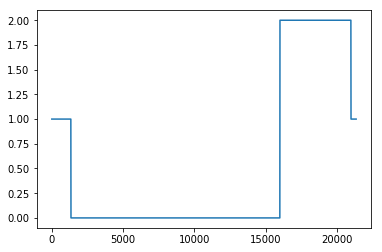

In [26]:
# mendefinisikan data x y graph
x = data.index
y = best_model.predict(data[6].values.reshape(-1, 1))
plt.plot(x, y)
plt.show()

In [27]:
data['state channel 6'] = best_model.predict(data[6].values.reshape(-1, 1))

In [28]:
data.head()

,0,1,2,3,4,5,6,7,state channel 6
time,,,,,,,,,
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520,1
5,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855,1
10,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333,1
15,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027,1
20,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291,1


In [29]:
state_0 = data[data['state channel 6'] == 0].index
state_0

Int64Index([ 1345,  1355,  1365,  1375,  1385,  1395,  1405,  1415,  1425,
             1435,
            ...
            15895, 15905, 15915, 15925, 15935, 15945, 15955, 15965, 15975,
            15985],
           dtype='int64', name='time', length=1465)

In [30]:
duration_state0 = state_0[-1] - state_0[0]
print(duration_state0)

14640


In [31]:
state_2 = data[data['state channel 6'] == 2].index
state_2

Int64Index([15995, 16005, 16015, 16025, 16035, 16045, 16055, 16065, 16075,
            16085,
            ...
            20875, 20885, 20895, 20905, 20915, 20925, 20935, 20945, 20955,
            20965],
           dtype='int64', name='time', length=498)

In [32]:
duration_state2 = state_2[-1] - state_2[0]
print(duration_state2)

4970


In [33]:
state_1 = data[data['state channel 6'] == 1].index
state_1

Int64Index([    0,     5,    10,    15,    20,    25,    30,    35,    40,
               45,
            ...
            21245, 21255, 21265, 21275, 21285, 21295, 21305, 21315, 21325,
            21335],
           dtype='int64', name='time', length=193)

In [34]:
duration_state1 = (1335 - 0) + (21335 - 20975)
print(duration_state1)

1695


In [35]:
mean_duration = [duration_state0/1, duration_state1/2, duration_state2/1]
print(mean_duration)

[14640.0, 847.5, 4970.0]


In [46]:
std_duration = [0, int(487.5), 0]
std_duration

[0, 487, 0]

In [41]:
duration_state1_list = [1335, 360]

In [42]:
std_duration_state1 = np.std(duration_state1_list)
std_duration_state1

487.5

In [48]:
# RUL
conf = 0.95 # confidence coefficient

# RUL Upper
rul_upper = (mean_duration[0] + conf * std_duration[0]) + \
            (mean_duration[1] + conf * std_duration[1]) + \
            (mean_duration[2] + conf * std_duration[2])

# RUL Mean
rul_mean = (mean_duration[0]) + \
           (mean_duration[1]) + \
           (mean_duration[2])

# RUL lower
rul_lower = (mean_duration[0] - conf * std_duration[0]) + \
            (mean_duration[1] - conf * std_duration[1]) + \
            (mean_duration[2] - conf * std_duration[2])

In [49]:
print('RUL Upper: ', rul_upper)
print('RUL Mean: ', rul_mean)
print('RUL Lower: ', rul_lower)

RUL Upper:  20920.15
RUL Mean:  20457.5
RUL Lower:  19994.85
